## [1] Wine Dataset

In [62]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import chisquare
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from scipy.stats import chi2_contingency

In [63]:
df = pd.read_csv('wine.csv')
original_data = df
X = df.drop(columns=['Type'])
y = df['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df = df_scaled
print(df.columns)
print(df.describe().to_string())
print(y.value_counts())

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')
            Alcohol         Malic           Ash    Alcalinity     Magnesium     Phenols    Flavanoids  Nonflavanoids  Proanthocyanins         Color           Hue      Dilution       Proline
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  178.000000  1.780000e+02   1.780000e+02     1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02
mean  -8.382808e-16 -1.197544e-16 -8.370333e-16 -3.991813e-17 -3.991813e-17    0.000000 -3.991813e-16   3.592632e-16    -1.197544e-16  2.494883e-17  1.995907e-16  3.193450e-16 -1.596725e-16
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00    1.002821  1.002821e+00   1.002821e+00     1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00
min   -2.434235e+00 -1.432983e+00 -3.67916

## [2] Principal Component Analysis (PCA)

### [2.1] Correlation heatmap of features

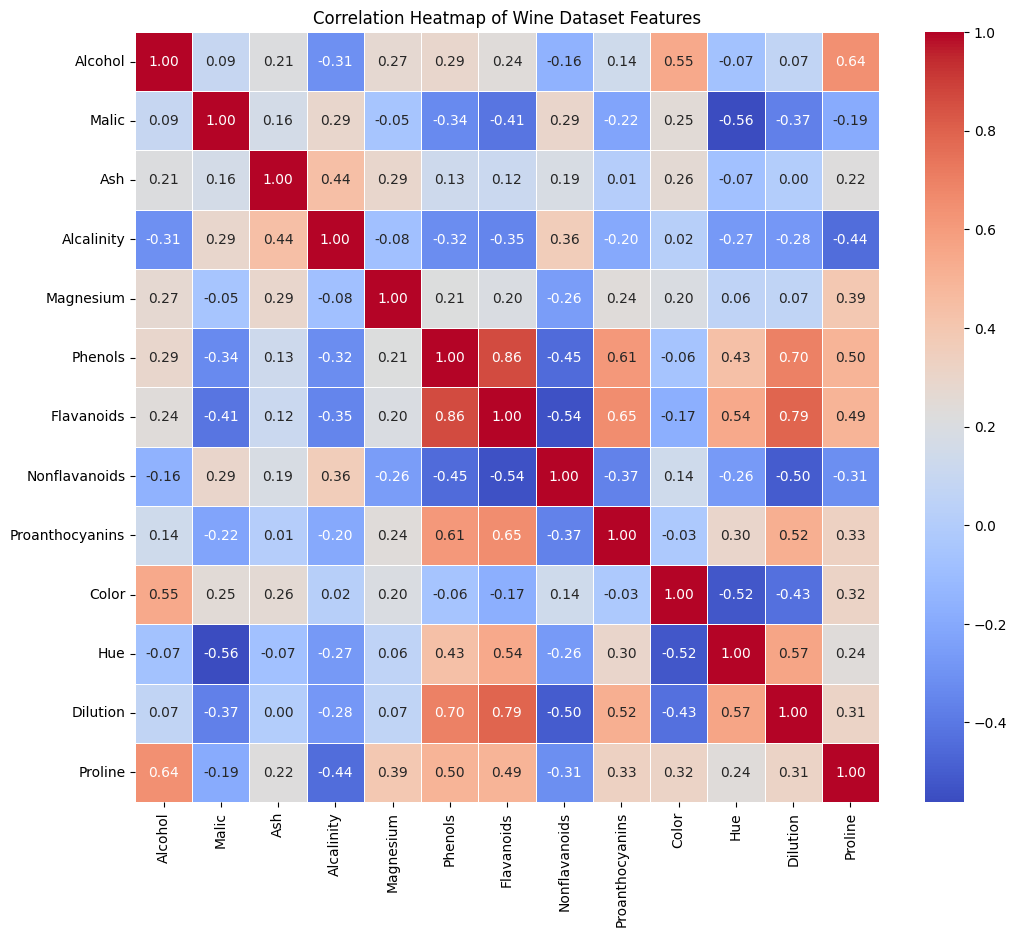

In [64]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Wine Dataset Features')
plt.show()

### [2.2] Parallel Analysis

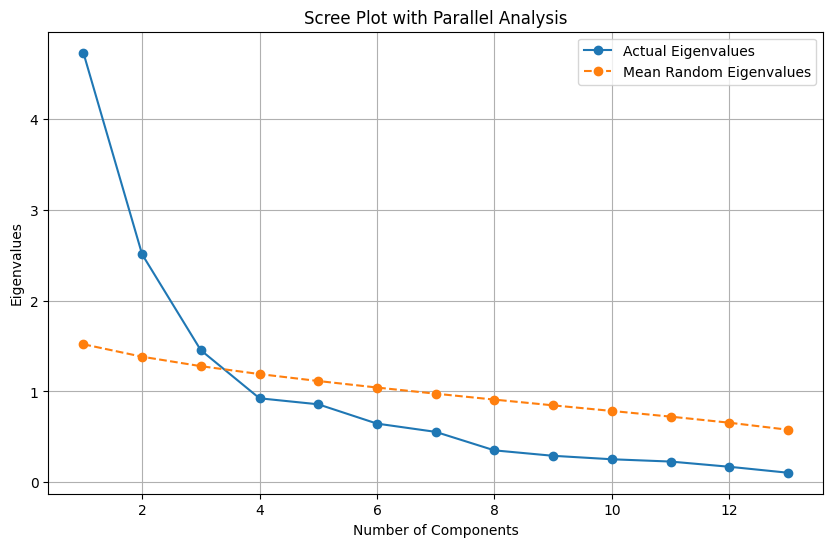

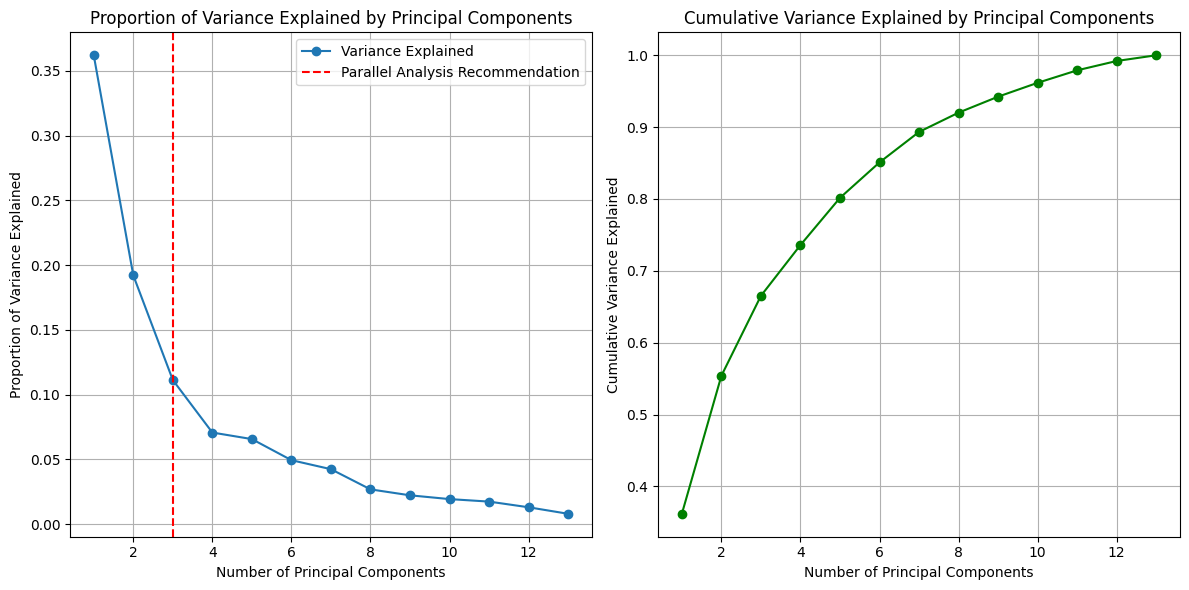

Number of principal components to retain based on parallel analysis: 3
Proportion of variance explained by each principal component:
Principal Component 1: 0.36
Principal Component 2: 0.19
Principal Component 3: 0.11
Principal Component 4: 0.07
Principal Component 5: 0.07
Principal Component 6: 0.05
Principal Component 7: 0.04
Principal Component 8: 0.03
Principal Component 9: 0.02
Principal Component 10: 0.02
Principal Component 11: 0.02
Principal Component 12: 0.01
Principal Component 13: 0.01
Parallel analysis recommends retaining fewer components than the proportion of variance explained criterion.


In [65]:
def parallel_analysis(data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    eigenvalues = pca.explained_variance_
    num_iterations = 1000
    random_eigenvalues = np.zeros((num_iterations, len(eigenvalues)))
    for i in range(num_iterations):
        random_data = np.random.normal(0, 1, size=data.shape)
        pca.fit(random_data)
        random_eigenvalues[i, :] = pca.explained_variance_
    mean_random_eigenvalues = np.mean(random_eigenvalues, axis=0)
    diff_eigenvalues = eigenvalues - mean_random_eigenvalues
    plt.figure(figsize=(10, 6))
    components_range = np.arange(1, len(eigenvalues) + 1)
    plt.plot(components_range, eigenvalues, marker='o', label='Actual Eigenvalues')
    plt.plot(components_range, mean_random_eigenvalues, marker='o', linestyle='--', label='Mean Random Eigenvalues')
    plt.title('Scree Plot with Parallel Analysis')
    plt.xlabel('Number of Components')
    plt.ylabel('Eigenvalues')
    plt.legend()
    plt.grid(True)
    plt.show()
    return diff_eigenvalues

n_components = X.shape[1]
diff_eigenvalues = parallel_analysis(X_scaled, n_components)
num_components_pa = np.sum(diff_eigenvalues > 0)
pca = PCA()
pca.fit(X_scaled)
variance_explained = pca.explained_variance_ratio_
cumulative_variance_explained = np.cumsum(variance_explained)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', label='Variance Explained')
plt.axvline(x=num_components_pa, color='r', linestyle='--', label='Parallel Analysis Recommendation')
plt.title('Proportion of Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o', color='g')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Number of principal components to retain based on parallel analysis:", num_components_pa)
print("Proportion of variance explained by each principal component:")
for i, var in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {var:.2f}")
if num_components_pa > len(variance_explained):
    print("Parallel analysis recommends retaining more components than the proportion of variance explained criterion.")
elif num_components_pa < len(variance_explained):
    print("Parallel analysis recommends retaining fewer components than the proportion of variance explained criterion.")
else:
    print("Parallel analysis and proportion of variance explained criterion recommend retaining the same number of components.")

### [2.3] Proportion of Variance

In [66]:
pca = PCA(n_components=3)
pca.fit(df)
variance_explained = pca.explained_variance_ratio_
print("Proportion of variance explained by the first three principal components:")
for i, explained_variance in enumerate(variance_explained):
    print(f"Principal Component {i+1}: {explained_variance:.2f}")
total_variance_explained = sum(variance_explained)
print(f"Total variance explained by the first three principal components: {total_variance_explained:.2f}")

Proportion of variance explained by the first three principal components:
Principal Component 1: 0.36
Principal Component 2: 0.19
Principal Component 3: 0.11
Total variance explained by the first three principal components: 0.67


####  Parallel Analysis suggests retaining 3 principal components.
#### Proportion of Variance Explained Criterion indicates that the first 3 principal components collectively account for 66.52997% of the dataset's information, indicating sufficiency.
```
Comparison: Both methods concur on retaining 3 principal components.
```

### [2.4] Scatter plots for the first two principal components

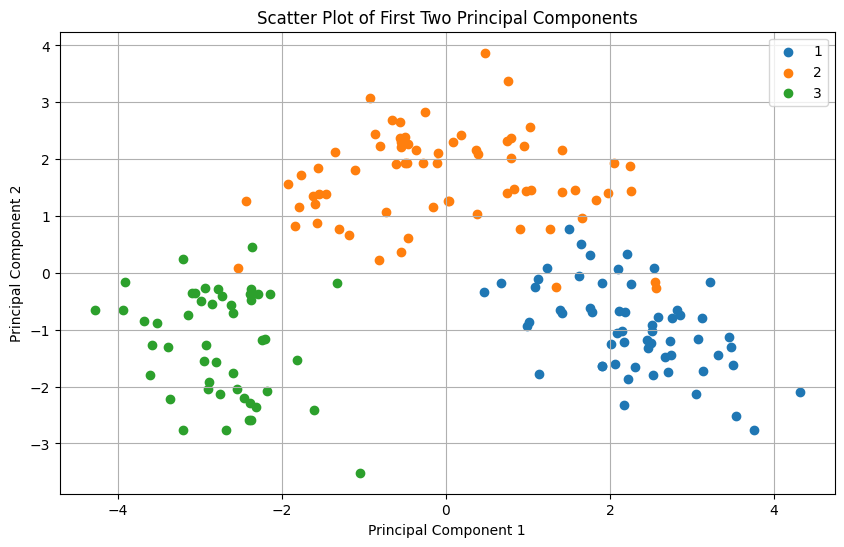

In [67]:
pca_transformed = pca.transform(df)
pc1 = pca_transformed[:, 0]
pc2 = pca_transformed[:, 1]
plt.figure(figsize=(10, 6))
for wine_type in y.unique():
    plt.scatter(pc1[y == wine_type], 
                pc2[y == wine_type], 
                label=wine_type)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()


##### Interpretation: Significant overlap exists between wine types 1 and 2, with a lesser overlap between wine types 2 and 3. 
##### These overlaps imply that the first two principal components might not sufficiently distinguish between the wine types. 
##### It suggests that factors beyond these components could influence the dataset's variability and the differentiation of wine types.
##### To enhance the separation among wine types, consideration of additional principal components could be beneficial.

## [3] Chi-Square Test - Goodness of Fit

### [3.1] Hypotheses:

**Null Hypothesis (H0):** The observed distribution of wine types does not significantly differ from an equal distribution amongst the three types.

**Alternative Hypothesis (H1):** The observed distribution of wine types significantly differs from an equal distribution amongst the three types.

### Expected Frequencies:

Since we assume an equal distribution among the three types, each type is expected to have 178/3 = 59.33 occurrences.

### [3.2] Performing Chi-Square Goodness of Fit Test

In [68]:
observed_frequencies = np.array([59, 71, 48])
expected_frequency = 178 / 3
expected_frequencies = np.array([expected_frequency, expected_frequency, expected_frequency])
chi2_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
df = len(observed_frequencies) - 1
print("Chi-Square Statistic:", chi2_statistic)
print("Degrees of Freedom:", df)
print("p-value:", p_value)

Chi-Square Statistic: 4.4606741573033695
Degrees of Freedom: 2
p-value: 0.10749219070565924


### [3.3] Interpretation

- If the p-value is below the significance level, we reject the null hypothesis, indicating significant evidence of deviation from an equal wine type distribution.
- When the p-value exceeds the significance level, we fail to reject the null hypothesis, suggesting insufficient evidence to conclude a significant deviation from equal distribution.

In [69]:
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. The observed distribution significantly differs from an equal distribution.")
else:
    print("Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.")

Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.


## [4] Chi-Square Test - Independence

### [4.1] Categorise Alcohol Content

In [70]:
low_percentile = original_data['Alcohol'].quantile(0.33)
high_percentile = original_data['Alcohol'].quantile(0.66)
def categorize_alcohol(alcohol):
    if alcohol <= low_percentile:
        return 'Low'
    elif low_percentile < alcohol <= high_percentile:
        return 'Medium'
    else:
        return 'High'

### [4.2] Contingency Table

In [71]:
original_data['Alcohol_Category'] = original_data['Alcohol'].apply(categorize_alcohol)
contingency_table = pd.crosstab(original_data['Type'], original_data['Alcohol_Category'])

### [4.3] Hypotheses

- Null hypothesis (H0): The choice of wine type is independent of the alcohol content.
- Alternative hypothesis (Ha): The choice of wine type is dependent on the alcohol content.

### [4.4] Performing Chi-Squared Test

In [72]:
chi2_statistic, p_value, dof, _ = chi2_contingency(contingency_table)
alpha = 0.05
print("Contingency Table (Cross-tabulation):")
print(contingency_table)
print("\nChi-Squared Test Results:")
print(f"Chi-Square Statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

Contingency Table (Cross-tabulation):
Alcohol_Category  High  Low  Medium
Type                               
1                   43    0      16
2                    3   53      15
3                   15    6      27

Chi-Squared Test Results:
Chi-Square Statistic: 118.77146680058311
P-value: 9.77322789202807e-25
Degrees of Freedom: 4


### [4.5] Interpretation

- If the p-value is lower than the significance level, we reject the null hypothesis, indicating significant evidence of an association between wine type preference and alcohol content level (Low, Medium, High).
- If the p-value exceeds the significance level, we fail to reject the null hypothesis, signifying that we cannot conclude a significant association between wine type preference and alcohol content level (Low, Medium, High) based on our data.

In [73]:
if p_value <= alpha:
    print("Reject the null hypothesis. There is an association between wine type and alcohol category.")
else:
    print("Fail to reject the null hypothesis. There is no association between wine type and alcohol category.")

Reject the null hypothesis. There is an association between wine type and alcohol category.
